# Generating coeval boxes and lightcones

The majority of the functions for generating these two objects are the same, with the exception of the lightcone class having the extra attribute Lightconer (the lightconer object from 21cmFAST, required for plotting of the lightcone) and the plot_lightcone function; and the lightcone having a central redshift and redshift range, as opposed to the single input redshift for the box.  
Here, we demonstrate with a box.

In [3]:
from postEoR import generation as gen
import matplotlib.pyplot as plt
import numpy as np

We can specify the desired redshift (+ redshift range for the cone), the physical dimensions and number of cells, and the overdensity limit for inclusion of cells in halos.

In [9]:
box = gen.generate_box(6, 250, 40, overdens_cap=1.686, connectivity=3, normalise_halos=True)

54194
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve


We can plot colormaps, power spectra, halo mass functions etc. from the object itself.

# Halo mass functions

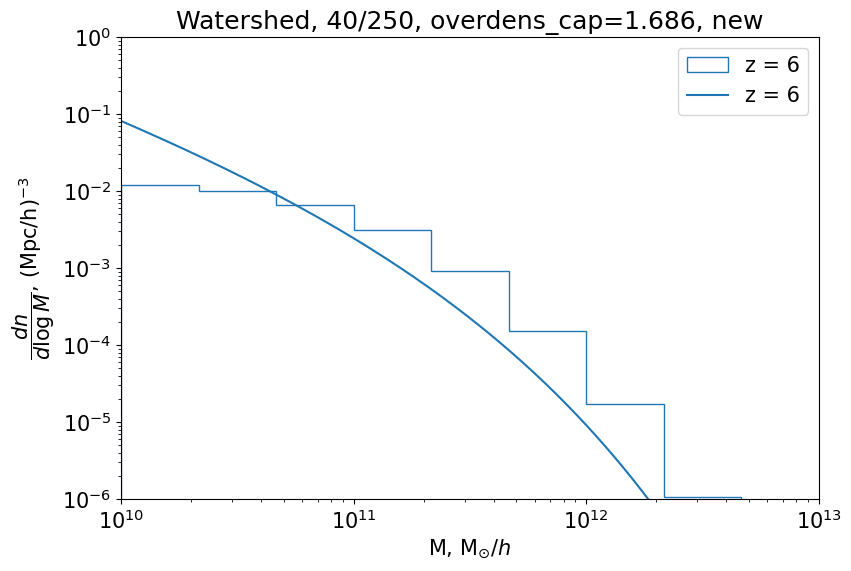

In [5]:
box.gen_hmf(title="Watershed, 40/250, overdens_cap=1.686, new", Mmax=13, Mmin=10)
plt.ylim(1e-6, 1e-0)
plt.xlim(1e10, 1e13)
plt.show()

/Users/Rach/opt/anaconda3/envs/fast/lib/python3.11/site-packages/py21cmfast/inputs.py:519: UserWarning: The USE_INTERPOLATION_TABLES setting has changed in v3.1.2 to be default True. You can likely ignore this warning, but if you relied onhaving USE_INTERPOLATION_TABLES=False by *default*, please set it explicitly. To silence this warning, set it explicitly to True. Thiswarning will be removed in v4.
  warnings.warn(


54194
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve


/Users/Rach/opt/anaconda3/envs/fast/lib/python3.11/site-packages/hmf/density_field/transfer_models.py:233: UserWarning: 'extrapolate_with_eh' was not set. Defaulting to True, which is different behaviour than versions <=3.4.4. This warning may be removed in v4.0. Silence it by setting extrapolate_with_eh explicitly.
  warnings.warn(


55636
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
54329
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
50985
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to

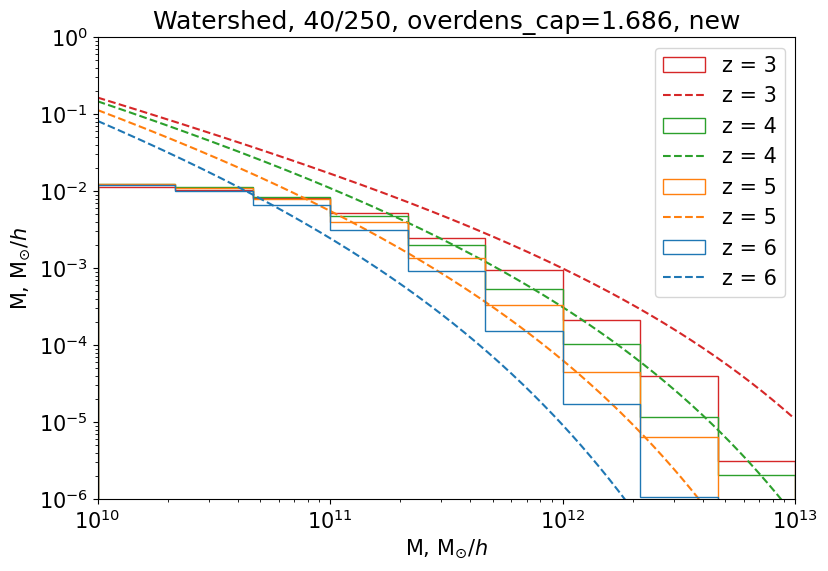

In [4]:
box = gen.generate_box(3, 250, 40, overdens_cap=1.686, connectivity=3, normalise_halos=True)
box.gen_hmf(title="Watershed, 40/250, overdens_cap=1.686, new", Mmax=13, Mmin=10, color="tab:red", linestyle="--")
box = gen.generate_box(4, 250, 40, overdens_cap=1.686, connectivity=3, normalise_halos=True)
box.gen_hmf(title="Watershed, 40/250, overdens_cap=1.686, new", Mmax=13, Mmin=10, color="tab:green", linestyle="--")
box = gen.generate_box(5, 250, 40, overdens_cap=1.686, connectivity=3, normalise_halos=True)
box.gen_hmf(title="Watershed, 40/250, overdens_cap=1.686, new", Mmax=13, Mmin=10, color="tab:orange", linestyle="--")
box = gen.generate_box(6, 250, 40, overdens_cap=1.686, connectivity=3, normalise_halos=True)
box.gen_hmf(title="Watershed, 40/250, overdens_cap=1.686, new", Mmax=13, Mmin=10, color="tab:blue", linestyle="--")
plt.ylim(1e-6, 1e-0)
plt.xlim(1e10, 1e13)
plt.show()

# Field slices

Below we plot a slice of the brightness temperature field. We may also do this for the halo field, using "halo" for the field parameter.

<Figure size 1300x600 with 0 Axes>

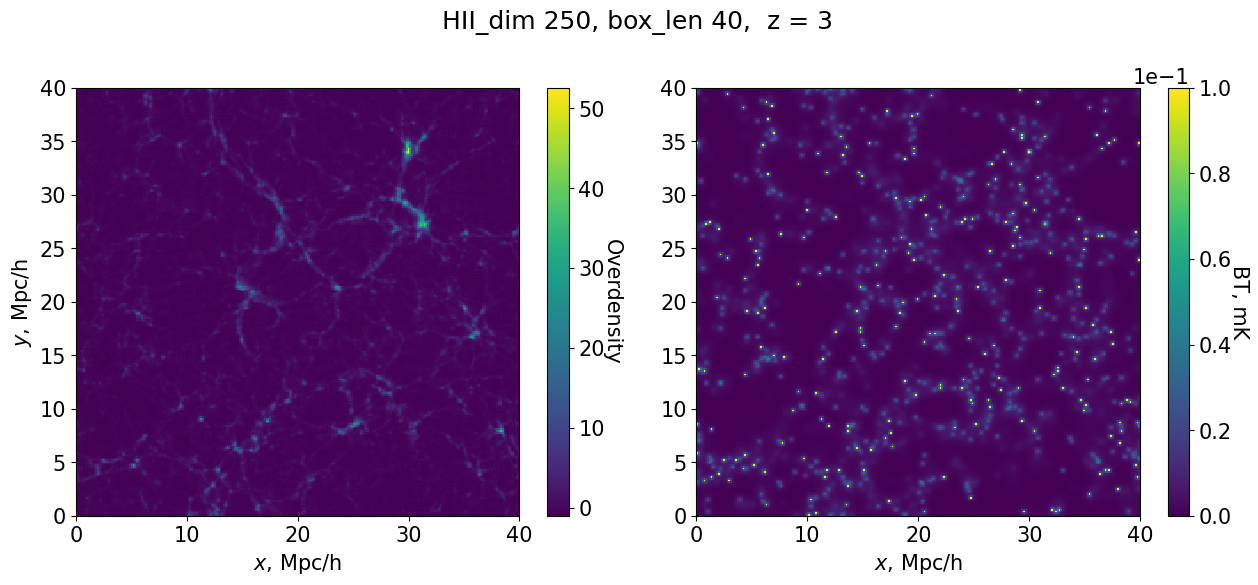

In [13]:
box.plot_slice(field="BT", vmax=1e-1)

# Power spectra and bias

The bias may also be calculated, and plot separately using matplotlib.

Generated bins.
Generated bins.
Using input bins
Using input bins


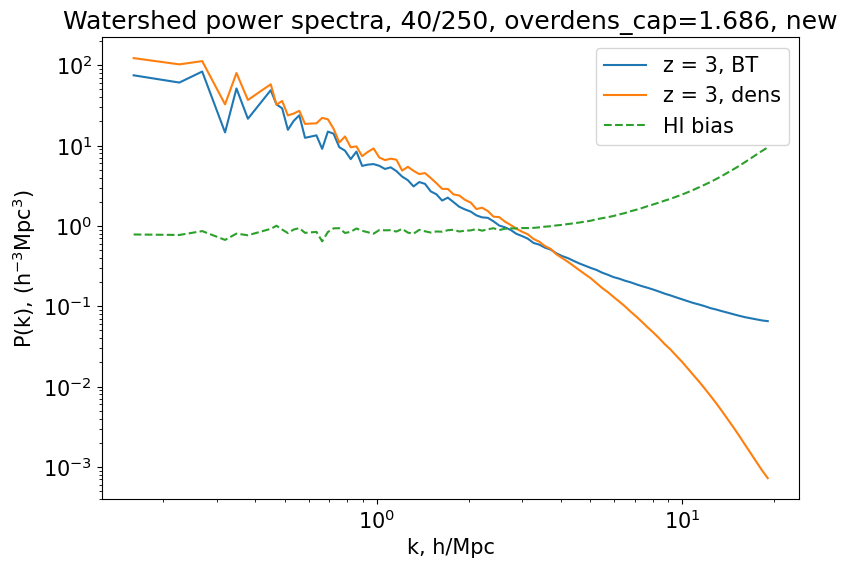

In [11]:
k, PS, err = box.get_PS("BT", color="tab:blue")
_, dens_ps, _ = box.get_PS("dens", color="tab:orange", title="Watershed power spectra, 40/250, overdens_cap=1.686, new")

k, bias = box.get_bias()
plt.plot(k, bias, color="tab:green", linestyle="--", label="HI bias")

plt.yscale("log")
plt.xscale("log")
plt.xlabel("k, h/Mpc")
plt.ylabel("P(k), (h$^{-3}$Mpc$^3$)")
plt.legend()

# Checking density parameter

We calculate the dimensionless HI density parameter $\Omega_{HI}$ below.

In [21]:
print(box.get_omega_HI())

346752305.4305677
0.0027299882734874077


# Including observational effects

In [2]:
import postEoR.observations as obs

AAstar = obs.SKA1LOW_AAstar(3)

some_survey = obs.Interferometer(AAstar, 10.1, 10, 100, 100, 0)



[4.59390643e-01 1.47323893e-01 1.38135158e-01 1.21814259e-01
 1.18169399e-01 1.06122468e-01 1.06566208e-01 9.12698472e-02
 8.57936889e-02 8.05172379e-02 7.14006407e-02 6.31722992e-02
 5.90807057e-02 5.11867707e-02 4.55162229e-02 4.01224856e-02
 3.59564640e-02 3.16266788e-02 2.68981402e-02 2.58271428e-02
 2.14213483e-02 1.82966649e-02 1.69857951e-02 1.45952220e-02
 1.31756668e-02 1.24475393e-02 9.77371401e-03 9.80539434e-03
 7.47739757e-03 7.19580869e-03 6.53381165e-03 5.65490968e-03
 5.44688273e-03 4.77876370e-03 4.28161127e-03 3.60023099e-03
 4.09813443e-03 3.14463010e-03 3.15092597e-03 2.94690950e-03
 2.93388213e-03 2.29854387e-03 2.24771333e-03 2.27390431e-03
 1.98980687e-03 2.01443814e-03 1.69759841e-03 1.72879954e-03
 1.32259856e-03 1.35173627e-03 1.10049096e-03 1.09388631e-03
 8.09725134e-04 8.82447200e-04 8.29474528e-04 8.46910929e-04
 8.31921355e-04 5.81834307e-04 8.07024363e-04 6.51729986e-04
 7.00368988e-04 6.11428378e-04 6.30400641e-04 5.41008977e-04
 6.95515463e-04 4.337328

/Users/Rach/opt/anaconda3/envs/fast/lib/python3.11/site-packages/ska_sdp_datamodels/visibility/vis_model.py:87: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'baselines' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapped into multiple indexed coordinates in the future (i.e., one coordinate for each multi-index level + one dimension coordinate). If you want to keep this behavior, you need to first wrap it explicitly using `mindex_coords = xarray.Coordinates.from_pandas_multiindex(mindex_obj, 'dim')` and pass it as coordinates, e.g., `xarray.Dataset(coords=mindex_coords)`, `dataset.assign_coords(mindex_coords)` or `dataarray.assign_coords(mindex_coords)`.
  super().__init__(data_vars, coords=coords, attrs=attrs)


'ps, k = some_survey2.noise_power_perp()\n\nk = k[~np.isnan(ps)]\nps = ps[~np.isnan(ps)]\n\nplt.plot(k, ps)'